# Project 2
### Exploring a variety of physical applications utilizing ODE solvers

#### Written by Owen Morehead - 4/1/2020


In [1]:
#Relevant modules

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import solve_ivp

%matplotlib inline
import sys
print(sys.version)

3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]


##  `rk2` ODE solver

`rk2` algorithm: 


$$\begin{align}
 \mbox{} &   y_{n+1} \ \simeq\
y_{n} + k_{2} \\
 &  k_{2} = h\; f\left(t_{n} +    \frac{h} {2},\
y_{n} + \frac{k_{1}} {2}\right), \quad
        k_{1} = h\; f(t_{n},\
        y_{n}),\end{align}$$



Integrating $$f(t)=\sin(\omega t)$$ starting at $t=0$ and $y=0$, let it run for at least 20 periods. 
Compare to canned solver like odeint in Scipy as well as analytical result. Plot the two results as a function of time, along with the exact analytic result.


$$
 f(t,y) = \frac{dy}{dt} = \sin(\omega t)\\
 y(t) = -\frac{\cos(\omega t)}{\omega} + C \\
 y(0) = 0 \quad \implies C = 1/\omega \\
 y(t) = \frac{1- \cos(\omega t)}{\omega}
$$

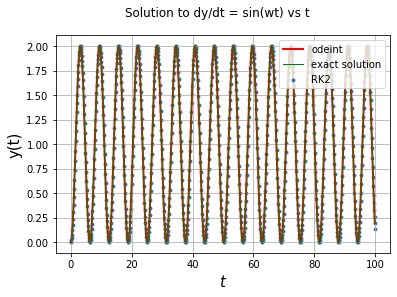

In [2]:
#RK2 ODE solver

h = .1
w = 1        #setting w = 1 as default

def f(t,y):  #cost funciton to integrate
    return(np.sin(w*t))

y,t = 0.0,0.0 #initialize y_0 and t_0
ts = []; ts.append(t)
ys = []; ys.append(y)

for i in range(0,1000):
    k1 = h*f(t,y)
    k2 = h*f(t+h/2,y+k1/2)
    t = t + h
    y = y + k2
    ts.append(t)
    ys.append(y)
    
    
fig1=plt.figure(1)
ax=fig1.gca()
ax.grid(True)
fig1.suptitle('Solution to dy/dt = sin(wt) vs t')
ax.set_xlabel('$t$', size=15)                 #labels
ax.set_ylabel('y(t)',size=15)

plt.scatter(ts,ys,s = 8,label='RK2')

#scipy.odeint solver
def funct(y,t):
    #let y[0] be (1-cos(wt))/w, y[1] be sin(wt)
    dydt = np.sin(w*t)
    return dydt

y0 = 0
tt = np.arange(0,100,h)
yy = integrate.odeint(funct,y0,tt)

plt.plot(tt,yy,'r',linewidth=2,label='odeint')



#Exact solution to ordinary differential equation
#with initial condition y(0) = 0
plt.plot(tt,1-np.cos(tt),'g',linewidth=1,label='exact solution')

plt.legend(loc='upper right')
plt.show()





We see all the integration methods plot the same funciton. We see the min value is y(t) = 0 and the max is y(t) = 2. This is because we have an initial boundary condition that y(t) = 0. If we set y(t) = -1, we would get the function oscilalting from -1 to 1. 



Next we test the solver with the function $$f(t,y)=1 + y^2+t^3$$ with start values of $(t0,y0)=(1.,-4.)$ and let it run to $t=2.0$ (*i.e.,* 1 second).

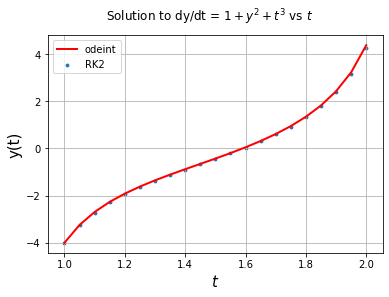

In [5]:
#RK2 ODE solver

h = .05 #step sive

def f(t,y):   #cost funciton
    return(1+y**2+t**3)

y,t = -4,1.0   #initialize y_0 and t_0
ts = []; ts.append(t)
ys = []; ys.append(y)

for i in np.arange(t,2,h):  #rk2 algorithm
    k1 = h*f(t,y)
    k2 = h*f(t+h/2,y+k1/2)
    t = t + h
    y = y + k2
    ts.append(t)
    ys.append(y)

    
#Plotting solution

fig1=plt.figure(1)
ax=fig1.gca()
ax.grid(True)
fig1.suptitle('Solution to dy/dt = $1+y^2+t^3$ vs $t$')
ax.set_xlabel('$t$', size=15)                 #labels
ax.set_ylabel('y(t)',size=15)

plt.scatter(ts,ys,s = 8,label='RK2')

#scipy.odeint solver
def funct(y,t):
    #let y[0] be -(1/w)cos(wt), y[1] be sin(wt)
    dydt = 1+y**2+t**3
    return dydt
y0 = -4
tt = np.arange(1,2.05,h)
yy = integrate.odeint(funct,y0,tt)

plt.plot(tt,yy,'r',linewidth=2,label='odeint')




plt.legend(loc='upper left')
plt.show()


Utilizing the solve_ivp() method in Scipy instead of odeint().

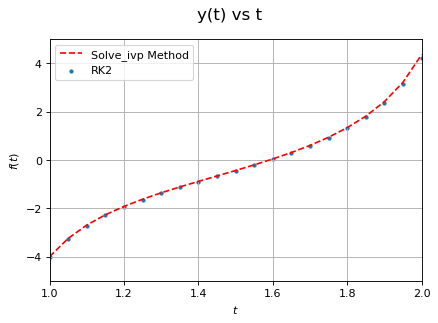

In [16]:
#RK2 ODE solver

h = .05

def f(t,y):
    return(1+y**2+t**3)

y,t = -4,1.0
ts = []; ts.append(t)
ys = []; ys.append(y)

for i in np.arange(t,2,h): #rk2 algorithm
    k1 = h*f(t,y)
    k2 = h*f(t+h/2,y+k1/2)
    t = t + h
    y = y + k2
    ts.append(t)
    ys.append(y)

#Now the code for solve_ivp method

f = lambda t,y: 1.0 + y*y + t*t*t
y0 = np.array([-4.0])
times = (1.0,2.1)  #have to use a tuple timespan for solve_ivp
timestep = (times[1] - times[0]) / 90  #time step size


soln = solve_ivp(f,times,y0,dense_output=True)

fig = plt.figure(dpi=80)
ax=fig.gca()
ax.grid(True)
fig.suptitle('y(t) vs t', fontsize=15)
plt.scatter(ts,ys,s = 8,label='RK2')
plt.plot(ts,soln.sol(ts)[0],'r--',label='Solve_ivp Method')
ax.set_xlabel('$t$')
ax.set_ylabel('$f(t)$')
ax.set_xlim(1,2)
ax.set_ylim(-5,5)
plt.legend()


----------------------
## Exploring the Van der Pol equation in phase space
Utilizing a solver such as Scipy odeint to explore the Van der Pol equation in phase space. Run for various value of $\xi$.

We first explored this with a euler method. Try to reproduce similar behavior as the funcion in lecture 1. Start system both inside and outside limit cycle. Zoom in to limit cycle to see asymptotic behavior.


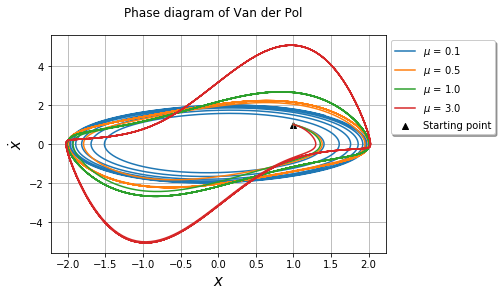

In [6]:
#Exploring Van der Pol Equation in Phase Space
l0 = 1
omega0 = 1
def van_der_pol(x,t):
    """Returns x'(t) and x''(t) for the Van_der_pol equation
    """
    nx0 = x[1]  #nx0 = x'(t)
    nx1 = -mu * (x[0]**2 - l0**2)*x[1] - ((omega0)**2*x[0])  #nx1 = x''(t)
    return [nx0,nx1]

period=2.*np.pi/omega0
nperiods=7.
ttot = nperiods*period 
deltat = 0.002*period
ts=np.arange(0.,ttot,deltat) 

fig1=plt.figure(1)
ax=fig1.gca()
ax.grid(True)
fig1.suptitle('Phase diagram of Van der Pol')
ax.set_xlabel('$x$', size=15)                 #labels
ax.set_ylabel('$\dot{x}$',size=15)

mus = [.1,.5,1.,3.]
x0 = [1,1]   #Setting (x_0, x'_0) to (1,1).
for mu in mus:
    xs = integrate.odeint(van_der_pol, x0, ts)
    plt.plot(xs[:,0],xs[:,1],label='$\mu$ = {0}'.format(mu))
plt.scatter(x0[0],x0[1], color='black',marker='^', label='Starting point')
plt.legend(loc='best',shadow=True,bbox_to_anchor=(1,1))


As mu gets larger, we see larger magnitude velocity values for values of x.

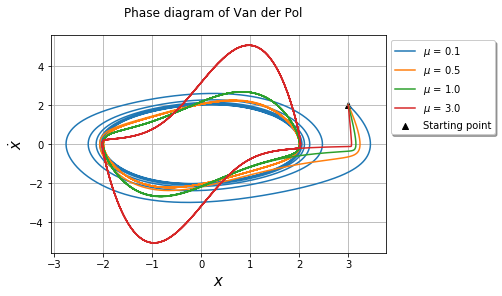

In [7]:
#Starting positions now outside the limit cycle
x0 = [3,2]  #x_0 and x'_0 are set to (3,2) outsid the limit cycle

fig1=plt.figure(1)
ax=fig1.gca()
ax.grid(True)
fig1.suptitle('Phase diagram of Van der Pol')
ax.set_xlabel('$x$', size=15)                 #labels
ax.set_ylabel('$\dot{x}$',size=15)

mus = [.1,.5,1.,3.]

for mu in mus:
    xs = integrate.odeint(van_der_pol, x0, ts)
    plt.plot(xs[:,0],xs[:,1],label='$\mu$ = {0}'.format(mu))
plt.scatter(x0[0],x0[1], color='black',marker='^', label='Starting point')
plt.legend(loc='best',shadow=True,bbox_to_anchor=(1,1))
    
    

-------------
## Oscillations in the potential space
Now lets look at oscillations in potentials of the form $V(x) = \frac{1}{p} kx^p$.

a) See equation (8.7). Utilizing the odeint solver. Plotting the oscillations $x(t)$ of systems with $p = 2,4,8$, in all cases setting $F_\text{ext}=0$ (for now). Also plotting $V(x)$ for each $p$ along with $x(t)$. Energy conserved during the oscillations?



In [4]:
from scipy.integrate import solve_ivp

In [9]:
def osc_sys(t,y,w,p):
    """Returns an array of y'(t) and y(t)
    """
    return np.array([y[1],-w*y[0]**(p-1)]) 
m = 1
k = 1
w = np.sqrt(k/m)

ps = np.array([2,4,8])   #test different values of p
y0 = np.array([1.0,0.0]) #initial values 
timespan = (0.0,40.0)   #timespan tuple to be used in solve_ivp
solutions = []      

for p in ps:
    f = lambda t,y: osc_sys(t,y,w,p)   #Logan showed me this line of code
                                       #a way to initialize the function and its parameters
    solutions.append(solve_ivp(f,timespan,y0,dense_output=True))



Text(0.5, 1.05, 'Position, Potential, and Energy vs Time')

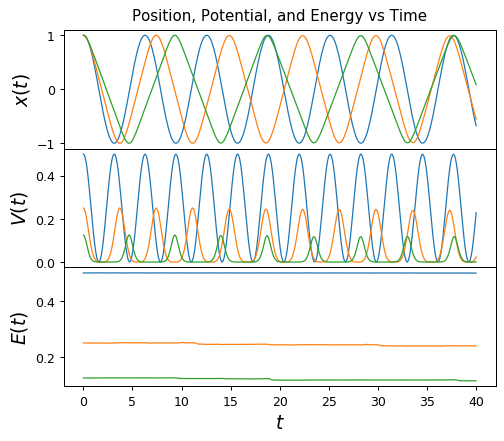

In [10]:
ts = np.linspace(timespan[0],timespan[1],num=400)

fig = plt.figure(dpi=90)

frame1 = fig.add_axes((.1,.66,.8,.33))   #plot of position vs time
for sol in solutions:
    plt.plot(ts, sol.sol(ts)[0],lw=1)
plt.ylabel(r'$x(t)$',fontsize=15)
#plt.xlim([np.min(ts),np.max(ts)])  #Keep getting error for xlim
                                    

frame2 = fig.add_axes((.1,.33,.8,.33))   #potential vs time
potentials = [sol.sol(ts)[0]**p /p for sol, p in zip(solutions,ps)]
for p in potentials:
    plt.plot(ts,p,lw=1)
plt.ylabel(r'$V(t)$',fontsize=15)


frame3 = fig.add_axes((.1,0.,.8,.33))    #total energy (V(t) + K(t)) vs time
kes  = [.5*sol.sol(ts)[1]**2 for sol in solutions]  #K = .5mv^2
totenergies = [pe + ke for pe,ke in zip(potentials,kes)]

for e in totenergies:
    plt.plot(ts,e,lw=1)

plt.ylabel(r'$E(t)$', fontsize=15)
plt.xlabel(r'$t$',fontsize=15)
plt.suptitle('Position, Potential, and Energy vs Time',y=1.05)

P = 2: perfect harmonic oscillator, amplitude independent oscillations. With P = 4, 8 we get amplitude dependence.
Second part, figure out what is the period of oscillation. How do you get that from a time sequence array of time values. Can use numpy to infer the period. Then plot the period vs amplitude.

We see in the bottom most graph that the total energy is conserved.

Plotting the period of oscillations as a function of initial amplitude for $p=2,4,8$ and comparing to the simple harmonic oscillator.


Text(0, 0.5, 'Period')

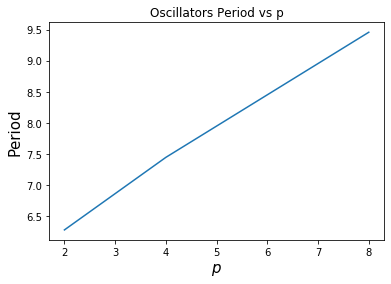

In [11]:
#now utilizing a function to find the min and max time values to find the period
#values occur where the derivative of x(t) equals zero

def find_deriv_zeros(ts,dys):
    """Computes the min and max time values for our oscillator function 
       Returns a list of those values
    """
    mins = []
    for i in range(1,len(dys)):
        dyp, dy = dys[i-1],dys[i]
        if dyp <=0 and dy>0:
            mins.append((ts[i] + ts[i-1])/2)  #saving average of two time values
                                              #a best approx for the time value at y'(t)=0
    return mins

periods = []

for sol in solutions:
    minss = find_deriv_zeros(ts, sol.sol(ts)[1])
    periods.append(np.average(np.diff(minss)))


plt.plot(ps,periods)
plt.title('Oscillators Period vs p')
plt.xlabel('$p$',size=15)
plt.ylabel('Period',size=15)

Notice the nearly linear relationship between the period and p. This can be compared to the simple harmonic oscillator's period which does not depend on the value of p.

-------------------
## Exploring the simple pendelum with periodic driving force and damping.
With zero driving force and zero damping, we start the system at $\theta=0$ and gradually increase the initial value of $\dot{\theta}$. Can you produce "over-the-top" motions? Over the top motions where the system goes around the same loop.

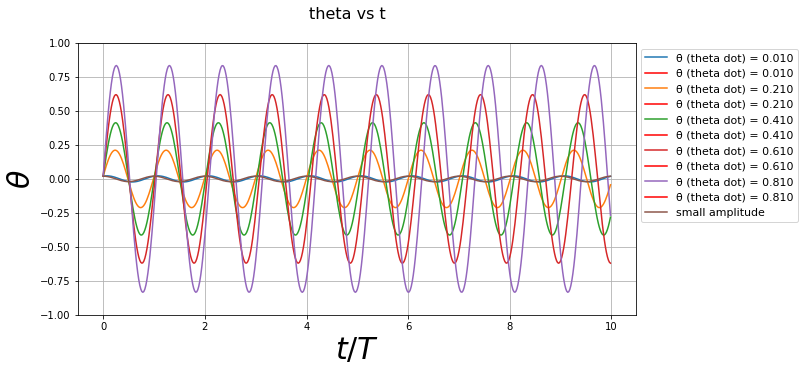

Text(0, 0.5, '$\\dot{\\theta}$')

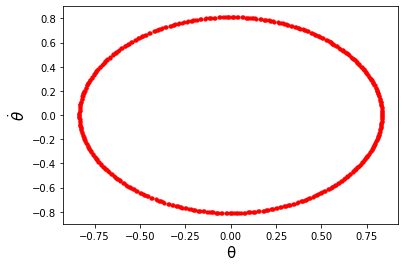

In [12]:
# simple pendulum
def spenderivs(Y, t):
    """Returns θ̇ (theta dot) and θ̈(theta double dot) 
    """
    # let Y[0] be \theta, Y[1] by \dot{\theta}
    return [Y[1], -np.sin(Y[0])]
    
    
theta0=.02
#thetadot0=0.01
#theta0=3.141
#thetadot0=0.01

T=2.*np.pi
h=T/50. 
ttot=10.*T
t=np.arange(0.,ttot,h)

figwidth=10
figheight=5

fig5=plt.figure(5,[figwidth,figheight])
ax=fig5.gca()
ax.grid(True)
fig5.suptitle('theta vs t', fontsize=16)
thetadots = np.arange(.01,1,.2)

for thetadot0 in thetadots:  #looping over increasing values of θ̇
    Y = integrate.odeint(spenderivs, [theta0, thetadot0], t)
    plt.plot(t/T, Y[:,0], 20, 'r',label='θ̇ (theta dot) = %.3f'% thetadot0)
    
plt.plot(t/T,theta0*np.cos(t), label='small amplitude')
ax.set_xlabel('$t/T$', size=30)                 #labels
plt.ylabel(r'$θ$',size=30)
#ysize=1.5*theta0
ax.set_ylim([-1, 1])
plt.legend(loc='upper right',prop={'size':11},bbox_to_anchor=(1.3,1))
plt.show()

plt.scatter(Y[:,0],Y[:,1],10,'r')
plt.xlabel('θ',size=15)
plt.ylabel(r'$\dot{\theta}$',size=15)



Now making plots in phase space. Exploring what happens with the damping the driving forces at various strenghts. 

Text(0, 0.5, '$\\dot{\\theta}$')

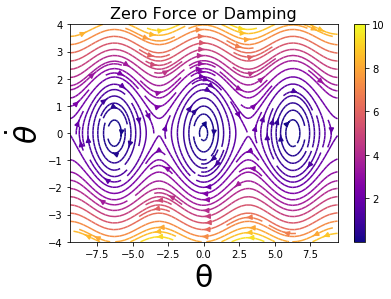

In [15]:
t = 0
w = 1
f0 = 0
b = 0.0
thetas = np.linspace(-3*np.pi,3*np.pi,1000)   #θ's
thetadots = np.linspace(-4,4,1000)            #θ̇'s

TS, TDS = np.meshgrid(thetas, thetadots)  #creating a meshgrid to make phase plot

US = TDS   #θ̇
VS = -np.sin(TS) - b*TDS + f0*np.cos(w*t)     #θ̈
E = 0.5*pow(TDS,2)+ (1.-np.cos(TS))    #color the phase space plot according to the energy

strm = plt.streamplot(thetas,thetadots,US,VS,density = 1.8,cmap=plt.cm.plasma,color=E)
plt.title('Zero Force or Damping', fontsize=16)
plt.colorbar(strm.lines)
plt.xlabel(r'θ', size=30)               
plt.ylabel(r'$\dot{\theta}$',size=30)

Text(0, 0.5, '$\\dot{\\theta}$')

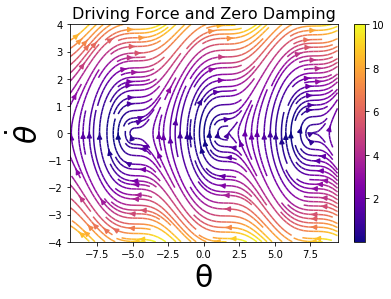

In [16]:
t = 0
w = 1
f0 = 1  #now we include a driving force value
b = 0.0
thetas = np.linspace(-3*np.pi,3*np.pi,1000)   #θ's
thetadots = np.linspace(-4,4,1000)            #θ̇'s

TS, TDS = np.meshgrid(thetas, thetadots)  #creating a meshgrid to make phase plot

US = TDS   #θ̇
VS = -np.sin(TS) - b*TDS + f0*np.cos(w*t)     #θ̈
E = 0.5*pow(TDS,2)+ (1.-np.cos(TS))    #color the phase space plot according to the energy

strm = plt.streamplot(thetas,thetadots,US,VS,density = 1.8,cmap=plt.cm.plasma,color=E)
plt.title('Driving Force and Zero Damping', fontsize=16)
plt.colorbar(strm.lines)
plt.xlabel(r'θ', size=30)               
plt.ylabel(r'$\dot{\theta}$',size=30)

With a driving force now included, we see the phase space orbit does not spiral into a fixed point like it did with no driving force. This is the expected behavior of the simple pendelum with a driving force. This force provides a periodic torque.

Text(0, 0.5, '$\\dot{\\theta}$')

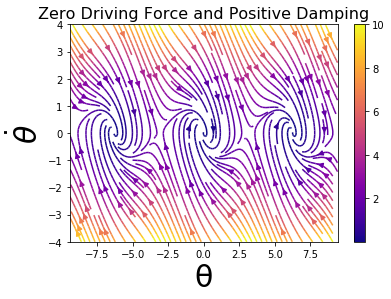

In [17]:
t = 0
w = 1
f0 = 0  
b = 1.0   #now we include a damping force value

thetas = np.linspace(-3*np.pi,3*np.pi,1000)  #θ's
thetadots = np.linspace(-4,4,1000)           #θ̇'s

TS, TDS = np.meshgrid(thetas, thetadots)  #creating a meshgrid to make phase plot

US = TDS   #θ̇
VS = -np.sin(TS) - b*TDS + f0*np.cos(w*t)    #θ̈
E = 0.5*pow(TDS,2)+ (1.-np.cos(TS))    #color the phase space plot according to the energy

strm = plt.streamplot(thetas,thetadots,US,VS,density = 1.8,cmap=plt.cm.plasma,color=E)
plt.title('Zero Driving Force and Positive Damping', fontsize=16)
plt.colorbar(strm.lines)
plt.xlabel(r'θ', size=30)               
plt.ylabel(r'$\dot{\theta}$',size=30)

A positive damping force is now introduced. This makes so that the energy of the oscillator dissipates continuously. It can be seen that as we decrease the damping force, the oscillations look more periodic.

We see that this chaotic or complex behavior falls inbetween periodic motion which produces closed figures in phase space, and random motion which produces scattered data everywhere. When viewed for long enough, this complex trajectories dont always remain on the same single structure for all time like we see. 



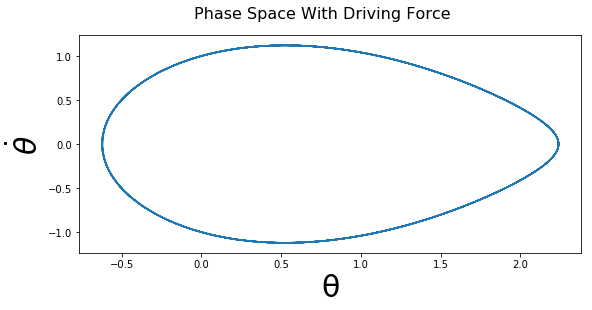

In [18]:
#following some of the assesment in this phase space exploration

def spendfield(Y,t):
    return [Y[1], -np.sin(Y[0])-b*Y[1]+f*np.cos(omega*t)]

b=0
f=.5   #nonzero driving force
omega=0.
time=0.
T=2.*np.pi
h=T/50. 
ttot=10.*T
t=np.arange(0.,ttot,h)
theta,thetadot = 0,1

eq = integrate.odeint(spendfield, [theta,thetadot],t)

fig = plt.figure(1,[9.,4.])
ax=fig.gca()
plt.plot(eq[:,0],eq[:,1])
fig.suptitle('Phase Space With Driving Force', fontsize=16)
plt.xlabel(r'θ', size=30)                 #labels
plt.ylabel(r'$\dot{\theta}$',size=30)
plt.show()

We see with an added driving force and zero damping, the phase space plot looks like a perturbed ellipse. 

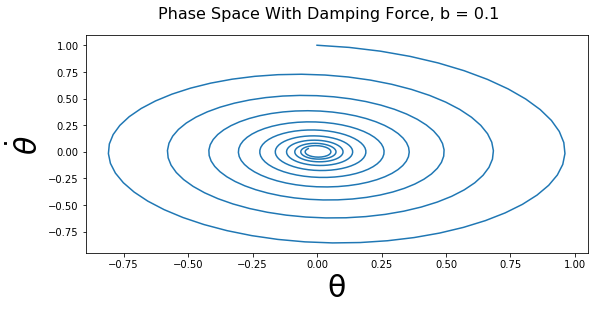

In [19]:
def spendfield(Y,t):
    return [Y[1], -np.sin(Y[0])-b*Y[1]+f*np.cos(omega*t)]

b=.1 #nonzero damping
f=0
omega=0.
time=0.
T=2.*np.pi
h=T/50. 
ttot=10.*T
t=np.arange(0.,ttot,h)
theta,thetadot = 0,1

eq = integrate.odeint(spendfield, [theta,thetadot],t)

fig = plt.figure(1,[9.,4.])
ax=fig.gca()
plt.plot(eq[:,0],eq[:,1])
fig.suptitle('Phase Space With Damping Force, b = {0}'.format(b), fontsize=16)
plt.xlabel(r'θ', size=30)                 #labels
plt.ylabel(r'$\dot{\theta}$',size=30)
plt.show()

-------------------
## Bifurcation Diagram with Duffings Equation
The Duffings equation describes the motion of a damped oscillator with a potential. This is more complex compared to simple harmonic motion. This is an example of a dynamical system which exhibits chaotic behavior as well as period doubling bifurcations. In this case, for Duffing's equation we use the parameters labeled below, and plot the attractor values of $x$ as a function of $f_0$ in the range $0.3<f_0<0.345$. For each value of $f_0$, we save the ending state at the end of the run and use that state as the starting values for the next value of $f_0$. This will help ensure we are keeping the system in the same potential well. 

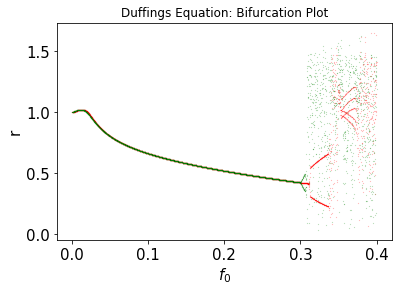

In [17]:

from scipy.integrate import odeint

delta = 0.1 #damping constant
omega = 1.4 #angular frequency of the periodic driving force
beta = 1    #amount of non-linearity in the restoring force
alpha = -1  #stiffness  constant

rs_up = []
rs_down = []

def duffings_eq(x, t,delta,omega,alpha,beta):
    """Returns x[1] = xdot, and duffings equation, ẍ, where x[0] = x
    """
    return [x[1],
            -alpha * x[0] - delta*x[1] - beta * x[0]**3 + f0 * np.cos(omega*t)]


num_steps = 4002
step = 0.0001
interval = num_steps * step
x0, xdot0 = 1, 0
ns = np.linspace(0, num_steps, num_steps)

#looping through increasing values of f_0
for n in ns:
    f0 = step * n
    t = np.linspace(0, (4*np.pi) / omega, 200)
    xs = odeint(duffings_eq, [x0, xdot0], t, args=(delta,omega,alpha,beta))
    for i in range(2):
        x0 = xs[100, 0]
        xdot0 = xs[100, 1]
        r = np.sqrt(x0**2 + xdot0**2)   #making a circle to store the value of 
                                        #x and xdot at the specific location 
        rs_up.append([n, r])

rs_up = np.array(rs_up)

#looping through decreasing values of f0
for n in ns:
    f0 = interval - step * n
    t = np.linspace(0, (4*np.pi) / omega, 200)
    xs = odeint(duffings_eq, [x0, xdot0], t, args=(delta,omega,alpha,beta))
    for i in range(2):
        x0 = xs[100, 0]
        xdot0 = xs[100, 1]
        r = np.sqrt(x0**2 + xdot0**2)    
        rs_down.append([num_steps - n, r])


rs_down = np.array(rs_down)


fig, ax = plt.subplots()
xticks = np.linspace(0, interval, 5)
ax.set_xticks([x / interval * num_steps for x in xticks])
ax.set_xticklabels(['{:.1f}'.format(xtick) for xtick in xticks])

plt.plot(rs_up[:, 0], rs_up[:,1], 'r.', markersize=0.1)
plt.plot(rs_down[:, 0], rs_down[:,1], 'g.', markersize=0.1)
plt.xlabel(r'$f_0$', fontsize=15)
plt.ylabel('r', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Duffings Equation: Bifurcation Plot')
plt.show()

There are two possible minima the system can fall into. This is why we are getting a mix of scattered values of r instead of values all following the bifurcation lines (which would be the case if there was only one possible minima. We can also visualize where the period doubling bifurcations take place.